In [1]:
from occultence import *

(0.99, 1.015)

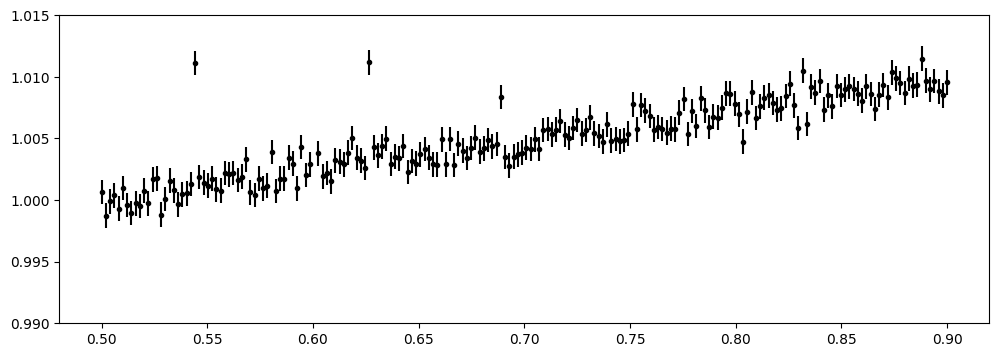

In [2]:
t = np.linspace(0.5,0.9,200)
ferr = 1e-3 * np.ones(len(t))
f = 1 + (ferr * (np.random.randn(len(t))))
f[22] = 1.01 # add a cosmic
f[63] = 1.008 # add a cosmic
f[50] = 0.0 # add a zero flux point
# f[100:120] *= 0.995 # add a transit
f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.99,1.015)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                 metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

🌈🤖 Warning! The time array is not an astropy.Time object, therefore there is no info about the 
format or scale.
We will assume that it is JD and TDB from here on!



In [4]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.2 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

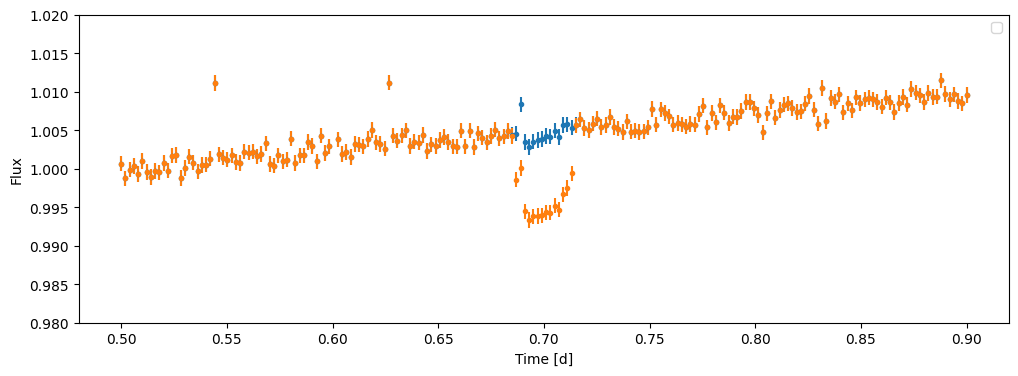

In [5]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [6]:
targ_with_transit.metadata

{'name': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.2 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [7]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=100, 
                                                          minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=1 * u.d,)

In [8]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,recovered,log_Prec,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.021426,0.831401,0.007805,0.988549,0.008213627132102315,0.017332,1.291380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
1,-0.299221,0.097941,0.001445,0.606531,0.003092035030585007,0.013687,0.549175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
2,-0.297692,0.791793,0.009782,1.420429,0.016958127883268198,0.014593,0.898951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
3,-0.031539,0.965859,0.005402,1.595376,0.02139264899077567,0.018174,1.398203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
4,-0.250141,0.139469,0.021414,2.902649,0.07081537204157878,0.016619,0.578403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.121769,0.666853,0.005447,2.357852,0.04672740768960789,0.018020,1.003804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
96,-0.105072,0.637489,0.005203,1.790557,0.026947266827892422,0.017467,1.000497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
97,-0.110487,0.083127,0.000393,2.195479,0.04051324914971804,0.018000,0.564455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
98,-0.153938,0.464913,0.010320,2.977995,0.07453952793733887,0.018310,0.826163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None


In [14]:
lcs_with_transits, planets = targ.inject_lots_of_transits(nfake=10, pool=False, 
                             minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                             minimum_period=0.5 * u.d, maximum_period=1 * u.d,)
lcs_with_transits

[<🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>]

In [15]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,recovered,log_Prec,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.236775,0.562679,0.010188,2.657395,0.05935411786195734,0.016818,0.826201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
1,-0.036653,0.081607,0.008789,1.412269,0.016763829031713584,0.017721,0.575002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
2,-0.114963,0.833304,0.008341,2.215569,0.041258082601604726,0.017851,1.139501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
3,-0.194015,0.662070,0.012158,0.928032,0.007238764438312264,0.015048,0.923535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
4,-0.112525,0.775326,0.004716,1.129438,0.010721701858013214,0.016467,1.098355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
5,-0.121351,0.101949,0.006030,1.226437,0.012642382996476378,0.016465,0.577096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
6,-0.087844,0.113865,0.009457,1.417078,0.01687820768533196,0.017049,0.593014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
7,-0.035913,0.927261,0.001422,1.877563,0.029629719368922836,0.018589,1.353668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
8,-0.028413,0.582378,0.003689,1.958920,0.0322531548673986,0.018788,1.045497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
9,-0.188383,0.490895,0.004648,1.232198,0.012761443269448731,0.015681,0.818131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None


In [16]:
lcs_with_transits[0].metadata

{'name': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.57972901 d>],
  'epoch': [<Quantity 0.82620106 d>],
  'inc': [<Quantity 1.56060796 rad>],
  'rp': [<Quantity 2.65739496 earthRad>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.05935412>],
  'duration': [<Quantity 0.01681758 d>]}}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

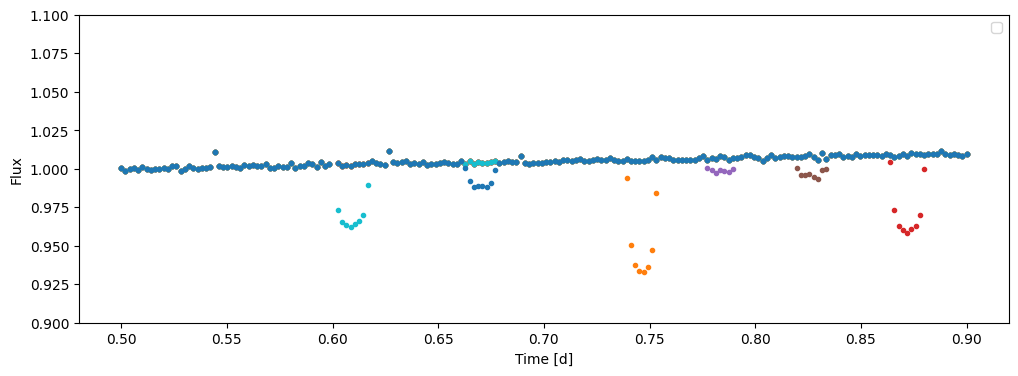

In [17]:
ax=targ.plot()
for lc in lcs_with_transits:
    lc.plot(ax=ax, ylims=[0.9,1.1])

For whatever reason the pooling doesn't seem to work in Jupyter on my computer...?

In [18]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


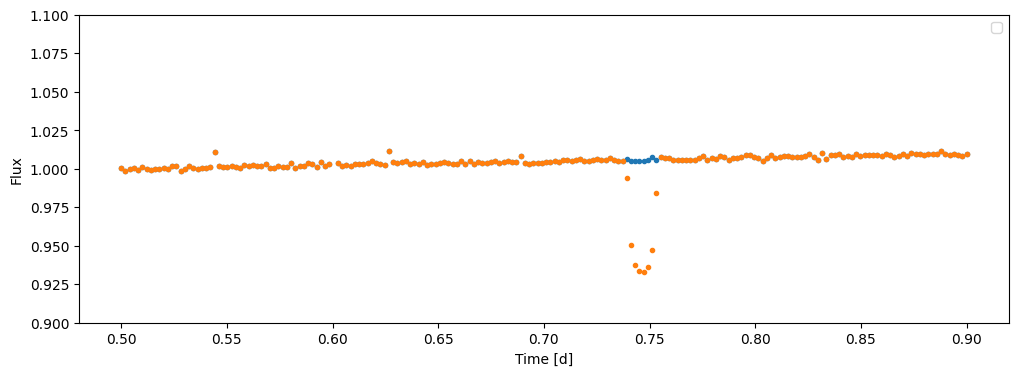

/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:73: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Masking NaN fluxes...
Masking zero fluxes...
Masking bad weather...
Masking cosmic ray hits...
Fitting rotation with square-exponential GP...
Initial Parameter Vector:  [-6.90775528 -5.81995636 -0.69314718]
Initial Params: AMP =  0.0029677346575823662 , SQEXP=  0.5 , JITTER =  0.0010000000000000002
Initial ln-likelihood: 68.12
Fitted GP HPs: [-25.9731426   -9.04113629  -0.84076262]
Fitted Params: AMP =  0.00011843618176573651 , SQEXP=  0.43138141942618935 , JITTER =  5.248165124532908e-12
Final ln-likelihood: 156.89


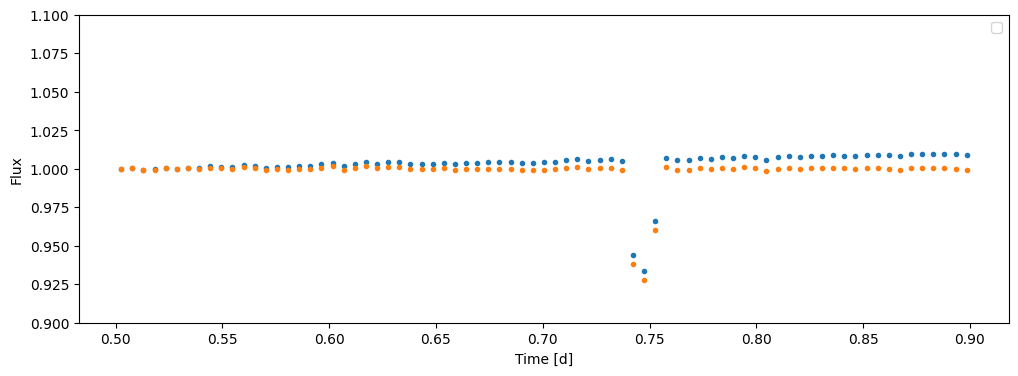

Running BLS Search
Number of Periods Checked:  10000


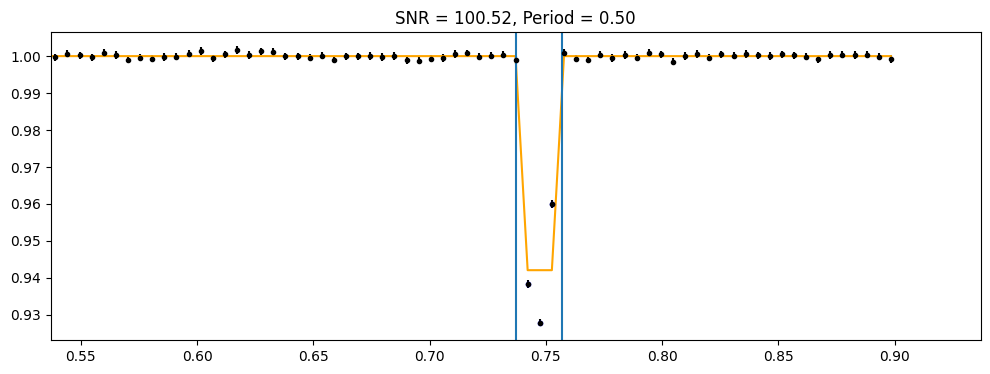

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Transit found!
{'name': 'test', 'R_star': <Quantity 0.1 solRad>, 'M_star': <Quantity 0.1 solMass>, 'injected_planet': {'period': [<Quantity 0.57972901 d>], 'epoch': [<Quantity 0.82620106 d>], 'inc': [<Quantity 1.56060796 rad>], 'rp': [<Quantity 2.65739496 earthRad>], 'ld': [[0.385, 0.304]], 'depth': [<Quantity 0.05935412>], 'duration': [<Quantity 0.01681758 d>]}, 'thresholds': {}, 'BLS_transits_found': True, 'BLS_transits_ind': array([46, 47, 48]), 'BLS_transits_params': {'period': [<Quantity 0.5 d>], 'depth': [0.0580340166222123], 'duration': [<TimeDelta object: scale='tdb' format='jd' value=0.020000000000000018>], 'epoch': [<Time object: scale='tdb' format='jd' value=0.7470041666666667>], 'epoch_start': [<Time object: scale='tdb' format='jd' value=0.7370041666666667>], 'epoch_end': [<Time object: scale='tdb' format='jd' value=0.7570041666666667>], 'snr': [100.51786535696847]}} 



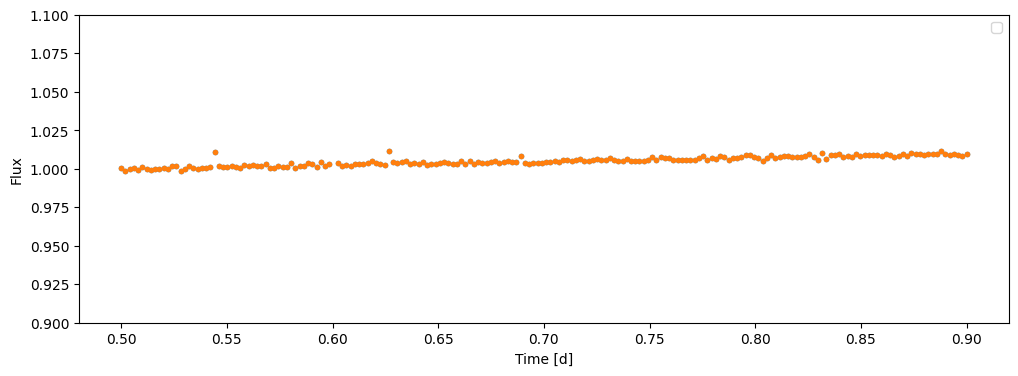

Masking NaN fluxes...
Masking zero fluxes...
Masking bad weather...
Masking cosmic ray hits...


/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:73: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Fitting rotation with square-exponential GP...
Initial Parameter Vector:  [-6.90775528 -5.83176008 -0.69314718]
Initial Params: AMP =  0.002932910283757121 , SQEXP=  0.5 , JITTER =  0.0010000000000000002
Initial ln-likelihood: 70.65
Fitted GP HPs: [-31.16635368  -9.02703563  -0.82579909]
Fitted Params: AMP =  0.0001201180400317367 , SQEXP=  0.43788494165558617 , JITTER =  2.914906132155059e-14
Final ln-likelihood: 162.21


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


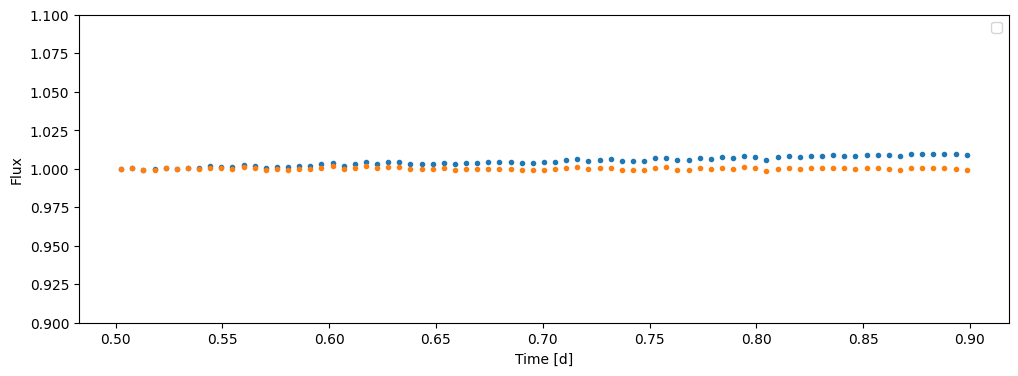

Running BLS Search


In [ ]:
total_injected = len(lcs_with_transits)
total_recovered = 0

for i, lc in enumerate(lcs_with_transits):
    ax=targ.plot()
    lc.plot(ax=ax, ylims=[0.9,1.1])
    plt.show()
    # clean
    clean_targ = lc.clean(dust_removal=False, bad_weather_removal=True, cosmics_removal=True, cosmic_boxsize=0.08, cosmic_nsigma=3)
    # bin 20 mins for the GP
    bin_targ = clean_targ.bin(dt= 20 * u.minute)
    # gp detrend
    gp_targ = bin_targ.gp_detrend(do_first_sigma_clip=True, do_second_sigma_clip=True, running_mean_boxsize=0.08, nsigma=3, plot=False)

    # we can also predict the GP for 7.5 min binning and use that for the BLS
    bin_targ = clean_targ.bin(dt= 7.5 * u.minute)
    gp_model = 1+gp_targ.metadata['gp'].predict(y=gp_targ.metadata['data_to_condition_gp'], t=bin_targ.time.value)[0]
    gp_smaller_binning = bin_targ._create_copy()
    gp_smaller_binning.timelike['flux'] = gp_smaller_binning.timelike['flux']/gp_model
    ax=bin_targ.plot()
    gp_smaller_binning.plot(ax=ax, ylims=[0.9,1.1])
    plt.show()
    
    # search for transit
    bls_targ = gp_smaller_binning.find_transits(minimum_period=0.5, maximum_period=10, transit_durations=np.linspace(0.01, 0.1, 10),plot=True)

    # determine whether the injected planet was adequately recovered
    if  bls_targ.metadata['BLS_transits_found'] == True:
        recovered = False
        print("Transit found!")
        print(bls_targ.metadata,"\n")
        rec = bls_targ.was_injected_planet_recovered(condition_on_epoch=1*u.hour)
        # loop over all recovered transits (in this case most likely 1):
        for r in range(len(bls_targ.metadata['BLS_transits_params']['depth'])):
            if rec[0][r]:
                recovered = True
        if recovered:
            total_recovered += 1
            planets['recovered'][i] = 1.0
    else:
        print("No transit found!\n")

In [ ]:
total_recovered / total_injected

In [ ]:
bls_targ.metadata

In [ ]:
bls_targ.metadata['BLS_transits_params']

In [ ]:
planets